In [40]:
# Library
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import numpy as np
import scipy.stats
from sklearn.metrics import mean_squared_error
from math import sqrt
import os
from os import listdir
from datetime import datetime
import pandas as pd
from matplotlib.dates import DateFormatter
import matplotlib.ticker as ticker
import matplotlib.dates as mdates
from sklearn.linear_model import LinearRegression
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn import metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import accuracy_score, confusion_matrix
from xgboost import XGBRegressor

ModuleNotFoundError: No module named 'xgboost'

In [21]:
#Regresion lineal simple pero con correccion por RH
df = data = pd.read_csv("D:/Josefina/Proyectos/ProyectoChile/dataset/proceed/merge_pm-maiac-meteo/1000/08-TOT_merge_PM25-MAIAC-Meteo.csv") 
df['AOD_550_HR'] = df['AOD_550'] * (1/(1- (df['humedad']/100)))
print(df.columns)
print(df["year"].unique())
print(df["estacion"].unique())
print(len(df["year"]))
df.head()

Index(['Unnamed: 0', 'date', 'AOD_470', 'AOD_550', 'PM25', 'temperatura',
       'humedad', 'dirViento', 'velViento', 'estacion', 'year', 'estacion_num',
       'AOD_550_HR'],
      dtype='object')
[2015 2016 2017 2018 2019 2020 2021 2022 2023]
['BSQ' 'OHG' 'PDH' 'CNA' 'PTA' 'FLD' 'CDE']
12835


,Unnamed: 0,date,AOD_470,AOD_550,PM25,temperatura,humedad,dirViento,velViento,estacion,year,estacion_num,AOD_550_HR
0,1,1/1/2015,0.1173,0.0840,13.7083,20.785763,49.979158,2.040632,2.040632,BSQ,2015,1,0.167930
1,2,2/1/2015,0.0808,0.0580,17.6667,22.714225,36.677087,1.859316,1.859316,BSQ,2015,1,0.091594
2,3,3/1/2015,0.0527,0.0376,24.5833,23.687146,35.003467,1.903799,1.903799,BSQ,2015,1,0.057849
3,4,4/1/2015,0.2181,0.1572,24.7500,24.307629,45.854158,1.818842,1.818842,BSQ,2015,1,0.290327
4,5,5/1/2015,0.1237,0.0887,20.3750,22.223954,51.895812,2.129595,2.129595,BSQ,2015,1,0.184391


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12835 entries, 0 to 12834
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    12835 non-null  int64  
 1   date          12835 non-null  object 
 2   AOD_470       12835 non-null  float64
 3   AOD_550       12835 non-null  float64
 4   PM25          12835 non-null  float64
 5   temperatura   12835 non-null  float64
 6   humedad       12835 non-null  float64
 7   dirViento     12835 non-null  float64
 8   velViento     12835 non-null  float64
 9   estacion      12835 non-null  object 
 10  year          12835 non-null  int64  
 11  estacion_num  12835 non-null  int64  
 12  AOD_550_HR    12835 non-null  float64
dtypes: float64(8), int64(3), object(2)
memory usage: 1.3+ MB


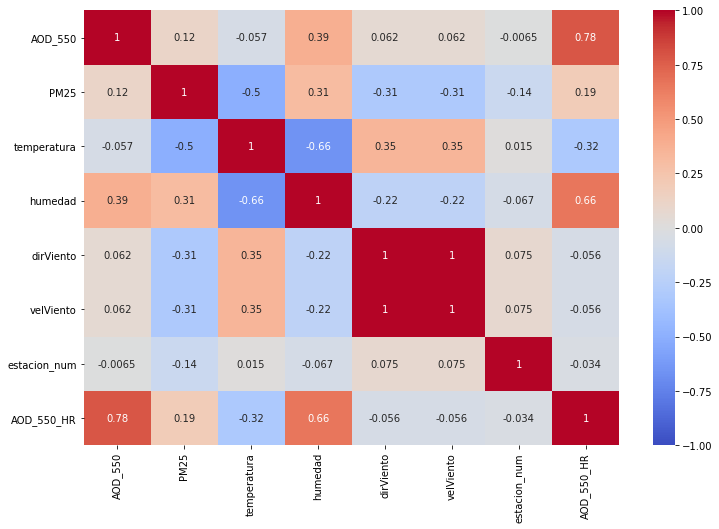

In [23]:
#Hacemos un corplot con todas las variables satelitales y de superficie
# #Dejamos afuera la columna date
df_subset = df.drop(columns = ['Unnamed: 0',"date","AOD_470","year","estacion"], inplace=False)
df_subset.head()
corr = df_subset.corr()
fig,ax = plt.subplots(1,1,figsize=(12,8))
ax = sns.heatmap(corr,  vmin = -1, vmax = +1, annot = True, cmap = 'coolwarm')

El DecisionTreeRegressor es una clase en la biblioteca scikit-learn que se utiliza para la regresión utilizando árboles de decisión. Un árbol de decisión es un modelo predictivo que divide los datos en subconjuntos más pequeños y homogéneos de acuerdo con ciertas características, siguiendo una estructura similar a un árbol. 
Concepto de Árbol de Decisión
Un árbol de decisión está compuesto por nodos que representan decisiones basadas en características del conjunto de datos. Hay tres tipos de nodos en un árbol de decisión:

- Nodo Raíz (Root Node): Es el primer nodo del árbol, donde se toma la primera decisión.
- Nodos Internos (Internal Nodes): Representan decisiones intermedias basadas en características del conjunto de datos.
- Hojas (Leaves): Representan los resultados finales o las predicciones.

## ¿Qué Hace DecisionTreeRegressor?
El DecisionTreeRegressor es un algoritmo de regresión que crea un árbol de decisión para predecir un valor continuo (en lugar de una clase, como en la clasificación). Aquí están los pasos principales que sigue:

- Seleccionar la Mejor Característica para Dividir los Datos:

El algoritmo evalúa todas las características y encuentra el punto de división que minimiza el error de predicción en los nodos hijos. Esto se hace típicamente usando criterios como el MSE (Mean Squared Error) o el MAE (Mean Absolute Error).
- Dividir los Datos:

Los datos se dividen en dos subconjuntos en cada nodo basado en el valor de la característica seleccionada.
- Repetir el Proceso:

El proceso de selección de la mejor característica y la división de los datos se repite recursivamente para cada subconjunto de datos resultante hasta que se cumple algún criterio de detención (como la profundidad máxima del árbol o el número mínimo de muestras en un nodo).
- Predicción:

Para hacer una predicción, se sigue el camino en el árbol basado en los valores de las características del ejemplo de entrada hasta llegar a una hoja, donde se encuentra el valor predicho

In [38]:
print(df_subset.columns)
# # Variables independientes (múltiples) y dependientes
#X = df[['AOD_550', 'temperatura', 'humedad','dirViento', 'velViento']] 
X = df[['AOD_550_HR', 'temperatura', 'humedad','dirViento', 'velViento']] 
y = df['PM25']

Index(['AOD_550', 'PM25', 'temperatura', 'humedad', 'dirViento', 'velViento',
       'estacion_num', 'AOD_550_HR'],
      dtype='object')


In [39]:
# Supongamos que df es tu DataFrame

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear el modelo
regressor = DecisionTreeRegressor(random_state=42)

# Entrenar el modelo
regressor.fit(X_train, y_train)

# Hacer predicciones
y_pred = regressor.predict(X_test)

# Calcular las métricas
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Imprimir las métricas
print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R^2 Score: {r2}")

Mean Squared Error (MSE): 339.3320664930962
Mean Absolute Error (MAE): 11.999620767432802
R^2 Score: -0.12658970856672624


In [41]:
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Supongamos que df es tu DataFrame y ya has definido X e y
# X = df[['AOD_550', 'temperatura', 'humedad', 'dirViento', 'velViento']]
# y = df['PM2.5']

# Número de pliegues para la validación cruzada
n_splits = 10

# Crear el modelo
regressor = DecisionTreeRegressor(random_state=42)

# Configurar KFold
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

# Inicializar listas para almacenar las métricas
mse_list = []
mae_list = []
r2_list = []

# Realizar K-Fold Cross Validation
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Entrenar el modelo
    regressor.fit(X_train, y_train)
    
    # Hacer predicciones
    y_pred = regressor.predict(X_test)
    
    # Calcular las métricas
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    # Almacenar las métricas
    mse_list.append(mse)
    mae_list.append(mae)
    r2_list.append(r2)

# Calcular y mostrar las métricas promedio
print(f"Mean Squared Error (MSE): {sum(mse_list)/n_splits}")
print(f"Mean Absolute Error (MAE): {sum(mae_list)/n_splits}")
print(f"R^2 Score: {sum(r2_list)/n_splits}")


Mean Squared Error (MSE): 306.4068782630692
Mean Absolute Error (MAE): 11.765495743746403
R^2 Score: -0.08227376425635788


In [44]:
# Inicializar listas para almacenar las métricas
mse_list
mae_list
r2_list

[-0.05350201032224078,
 -0.047046764701564214,
 -0.05023791206913719,
 -0.15854679553229212,
 -0.0593266574243414,
 -0.07566961507401615,
 -0.079007801028802,
 -0.08777456295590591,
 -0.17801326985244503,
 -0.03361225360283404]